In this exercise you will develop a neural network with fully-connected layers to perform classification,
and test it out on the CIFAR-10 dataset.


In [1]:

from __future__ import print_function
import os
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib
import matplotlib.pyplot as plt
from cs231n.classifiers.neural_net import TwoLayerNet
from cs231n.gradient_check import eval_numerical_gradient
from cs231n.vis_utils import visualize_grid
from utils import get_cifar10, report, run_tasks, makedirs
from data_loader import loader_data, preprocessing
import warnings
warnings.filterwarnings("ignore")

In [2]:
def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

In [3]:
def task1():
    print('*'*30+' Task 1 '+'*'*30)
    input_size = 4
    hidden_size = 10
    num_classes = 3
    num_inputs = 5
    np.random.seed(0)
    net = TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    '''
    Open the file cs231n/classifiers/neural_net.py and look at the method TwoLayerNet.loss.
    It takes the data and weights and computes the class scores, the loss, and the gradients on the parameters.
    Implement all the three parts:
    first part is the forward pass
    second part contains data loss and regularization loss.
    third part contains gradient of the loss with respect to the variables W1, b1, W2, and b2.
    '''

    correct_loss = 1.30378789133
    loss, grads = net.loss(X, y, reg=0.05)

    # should be very small, we get < 1e-12
    print( 'Difference between your loss and correct loss:')
    print( np.sum(np.abs(loss - correct_loss)))

    # these should all be less than 1e-8 or so
    for param_name in grads:
        f = lambda W: net.loss(X, y, reg=0.05)[0]
        param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
        print( '%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))
    print('*'*30+' Task 1 completed '+'*'*30)

In [4]:
task1()

****************************** Task 1 ******************************
Difference between your loss and correct loss:
0.01896541960606335
W2 max relative error: 3.440708e-09
b2 max relative error: 4.447625e-11
W1 max relative error: 3.561318e-09
b1 max relative error: 2.738421e-09
****************************** Task 1 completed ******************************


In [5]:
def task2():
    print('*'*30+' Task 2 '+'*'*30)
    '''
    To train the network we will use stochastic gradient descent (SGD).
    Look at the function TwoLayerNet.train and fill in the missing sections to implement the training procedure.
    You will also have to implement TwoLayerNet.predict, as the training process periodically performs prediction,
    to keep track of accuracy over time while the network trains. Once you have implemented the method,
    run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.2.
    Implement the train and predict functions in the file cs231n/classifiers/neural_net.py
    '''
    input_size = 4
    hidden_size = 10
    num_classes = 3
    num_inputs = 5
    np.random.seed(0)
    net = TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    stats = net.train(X, y, X, y,
                learning_rate=1e-1, reg=1e-5,
                num_iters=100, verbose=False)

    print( 'Final training loss: ', stats['loss_history'][-1])

    # plot the loss history
    plt.plot(stats['loss_history'])
    plt.xlabel('iteration')
    plt.ylabel('training loss')
    plt.title('Training Loss history')
    print('*'*30+' Task 2 completed '+'*'*30)

****************************** Task 2 ******************************
Final training loss:  0.015485605560839373
****************************** Task 2 completed ******************************


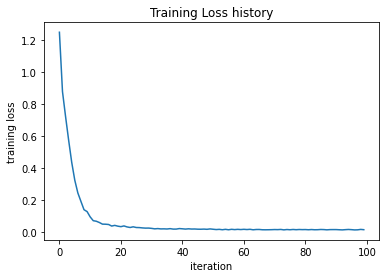

In [6]:
task2()

In [7]:
def preprocess(X_train,X_val,X_test,X_dev):
    X_train = np.reshape(X_train, (X_train.shape[0], -1))
    X_val = np.reshape(X_val, (X_val.shape[0], -1))
    X_test = np.reshape(X_test, (X_test.shape[0], -1))
    X_dev = np.reshape(X_dev, (X_dev.shape[0], -1))

    # As a sanity check, print out the shapes of the data
    print( 'Training data shape: ', X_train.shape)
    print( 'Validation data shape: ', X_val.shape)
    print( 'Test data shape: ', X_test.shape)
    print( 'dev data shape: ', X_dev.shape)

    # first: compute the image mean based on the training data
    mean_image = np.mean(X_train, axis=0) #3072 vector
    print( mean_image[:10]) # print a few of the elements

    # second: subtract the mean image from train, val, test, and dev data
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image
    X_dev -= mean_image
    print( X_train.shape, X_val.shape, X_test.shape, X_dev.shape)
    return X_train,X_val,X_test,X_dev

In [67]:
def task3(X_train, y_train, X_val, y_val):
    print('*'*30+' Task 3 '+'*'*30)
    input_size = 32 * 32 * 3
    hidden_size = 20
    num_classes = 10
    net = TwoLayerNet(input_size, hidden_size, num_classes)

    ################################################################################
    # train the model with the following parameters                                #
    #  num_iters = 1000, batch_size = 200,learning_rate=1e-4,                      #
    #  learning_rate_decay=0.95, reg=0.5                                           #
    #  predict on the validation dataset and print the validation accuracy         #
    ################################################################################
    result = net.train(X_train, y_train, X_val, y_val, learning_rate=1e-4, reg=0.7,
                       num_iters=10000, batch_size=200, learning_rate_decay=0.95)
    y_pred = net.predict(X_val)
    val_acc = np.mean(y_pred == y_val)
    '''
    Visualize the weights
    '''

    print(val_acc)
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.tight_layout()
    print('*'*30+' Task 3 completed'+'*'*30)

In [12]:
X_train,y_train,X_val,y_val,X_dev,y_dev,X_test,y_test = loader_data()
print('*'*30+' Dataloading completed'+'*'*30)
print('*'*30+' Preprocessing '+'*'*30)
X_train,X_val,X_test,X_dev = preprocess(X_train,X_val,X_test,X_dev)
print('*'*30+' Preprocessing completed'+'*'*30)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)
Train data shape:  (49000, 32, 32, 3)
Train labels shape:  (49000,)
Validation data shape:  (1000, 32, 32, 3)
Validation labels shape:  (1000,)
Test data shape:  (1000, 32, 32, 3)
Test labels shape:  (1000,)
****************************** Dataloading completed******************************
****************************** Preprocessing ******************************
Training data shape:  (49000, 3072)
Validation data shape:  (1000, 3072)
Test data shape:  (1000, 3072)
dev data shape:  (500, 3072)
[130.64189796 135.98173469 132.47391837 130.05569388 135.34804082
 131.75402041 130.96055102 136.14328571 132.47636735 131.48467347]
(49000, 3072) (1000, 3072) (1000, 3072) (500, 3072)
****************************** Preprocessing completed******************************


****************************** Task 3 ******************************
0.403
****************************** Task 3 completed******************************


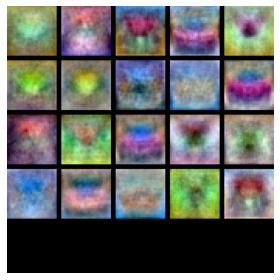

In [68]:
task3(X_train,y_train,X_val,y_val)